# Lab | Feature extraction

In [152]:
### ---> Below Cells are form the Lab 4.3: 

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [154]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

#### From Lab 4.1 - Deal with column names

In [155]:
col = list(customer_df.columns)

def PE8 (x):
       return x.lower().replace(' ', '_')

col_new = list(map(PE8, col))
customer_df.columns = col_new

#### From Lab 4.2: Here i am checking the categorical features for smaller groups and if they can be grouped together: 

##### 1) Education

In [156]:
customer_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [157]:
customer_df['education'] = np.where(customer_df['education'].isin(['Master', 'Doctor']), 'Higher Eduction', customer_df['education'])

##### 2. EmploymentStatus

In [158]:
customer_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [159]:
customer_df['employmentstatus'] = np.where(customer_df['employmentstatus'].isin(['Medical Leave', 'Disabled', 'Retired']), 'Other', customer_df['employmentstatus'])
customer_df['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

##### 3. Policy

In [160]:
customer_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [161]:
special = ['Special L1', 'Special L2', 'Special L3']
corp = ['Corporate L2', 'Corporate L1', 'Corporate L3']

def policy_clust(x):
            if x in special: 
                return 'Speial'
            elif x in corp: 
                return 'Corporate'
            else: 
                return x
        
customer_df['policy'] = customer_df['policy'].apply(policy_clust)
customer_df['policy'].value_counts()

Personal L3    3426
Personal L2    2122
Corporate      1968
Personal L1    1240
Speial          378
Name: policy, dtype: int64

##### 4. Vehicle Class

In [162]:
customer_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [163]:
customer_df['vehicle_class'] = np.where(customer_df['vehicle_class'].isin(['Sports Car', 'Luxury SUV', 'Luxury Car']), 'Others', customer_df['vehicle_class'])
customer_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Others            831
Name: vehicle_class, dtype: int64

In [164]:
customer_df = pd.DataFrame(customer_df)

### Now i will select the categorical features from the DF

In [165]:
customer_obj = customer_df.select_dtypes('object')
customer_date = customer_obj['effective_to_date']
customer_cat = customer_obj.drop(['customer', 'effective_to_date'], axis = 1)
len(customer_cat.columns)
customer_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 999.2+ KB


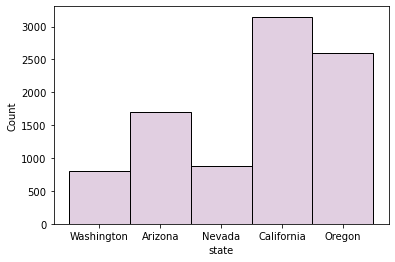

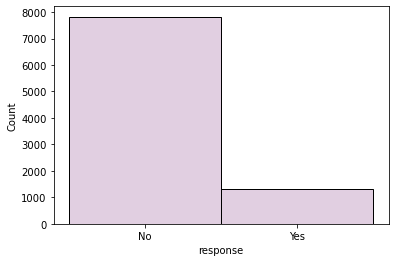

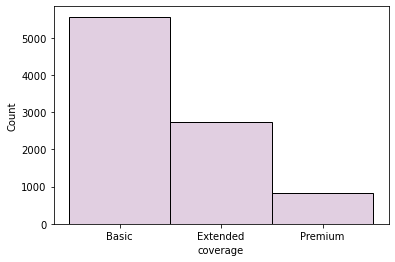

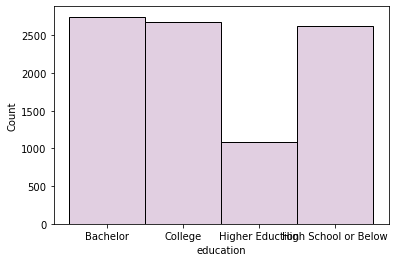

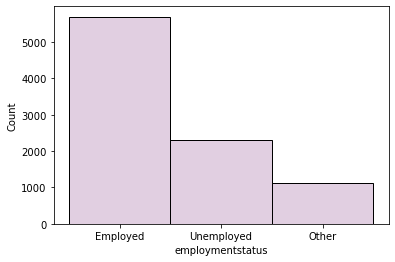

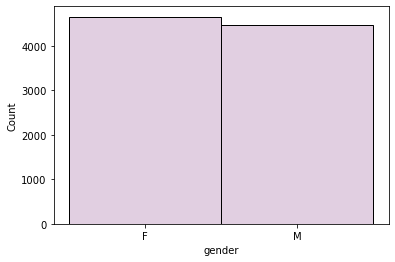

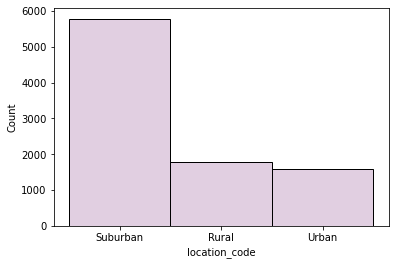

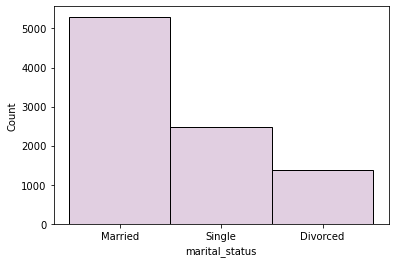

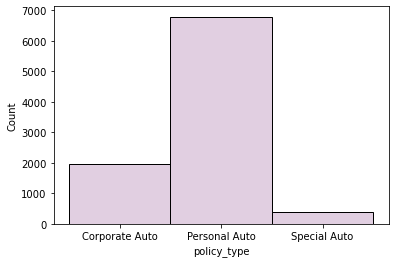

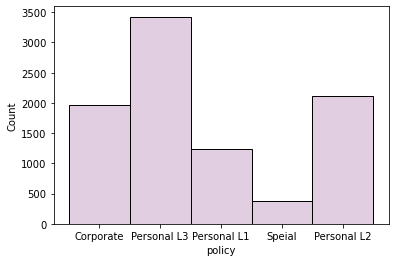

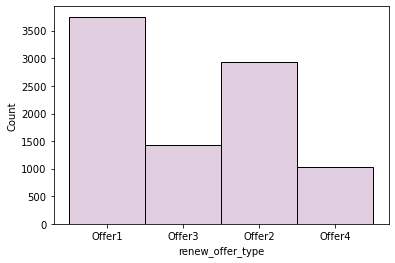

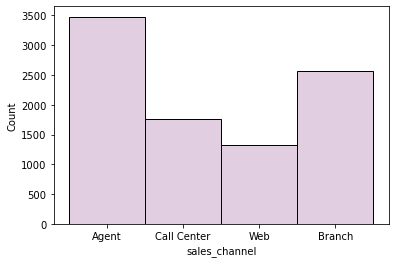

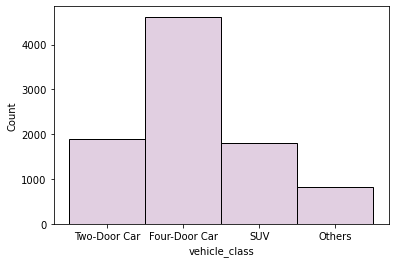

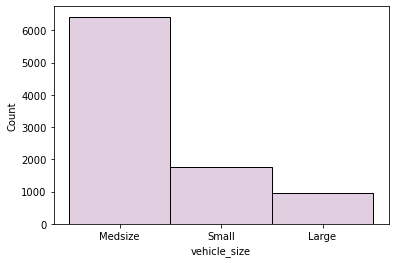

In [166]:
for i in customer_cat: 
    sns.histplot(x = customer_cat[i], color = 'thistle')
    plt.show()


## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [167]:
print(customer_cat['policy'].value_counts())
print()
print(customer_cat['policy_type'].value_counts())

Personal L3    3426
Personal L2    2122
Corporate      1968
Personal L1    1240
Speial          378
Name: policy, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64


In [168]:
## --> I dealt with them before in the previous labs. There seems to be no redundant column anymore.

## 4. Plot time variable. Can you extract something from it?

In [169]:
customer_date = pd.DataFrame(pd.to_datetime(customer_date))

In [170]:
customer_date['year'] = customer_date['effective_to_date'].dt.year
customer_date['month'] = customer_date['effective_to_date'].dt.month
customer_date['day'] = customer_date['effective_to_date'].dt.day


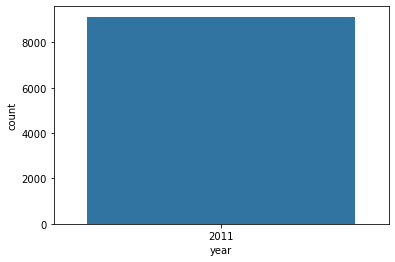

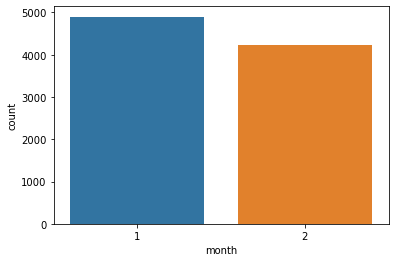

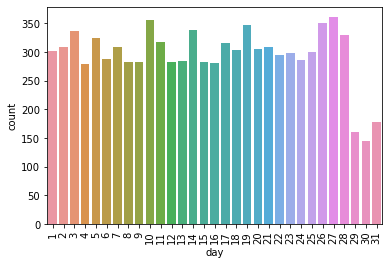

In [207]:
sns.countplot(x = customer_date['year'], dodge = False)
plt.show()

sns.countplot(x = customer_date['month'], dodge = False)
plt.show()

sns.countplot(x = customer_date['day'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
# We can see that the all of the insurances where opened in the year 2011 in the first two month (January and February).
# More contracts where bought in January maybe because february is a shorter month which we also can clearly see in the amount of insurances bought 